In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.isotonic import IsotonicRegression
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import os

In [7]:
df = pd.read_csv('covid_19_data.csv')

In [8]:
df.head(50)

SNo ObservationDate  Province/State  Country/Region      Last Update  \
0     1      01/22/2020           Anhui  Mainland China  1/22/2020 17:00   
1     2      01/22/2020         Beijing  Mainland China  1/22/2020 17:00   
2     3      01/22/2020       Chongqing  Mainland China  1/22/2020 17:00   
3     4      01/22/2020          Fujian  Mainland China  1/22/2020 17:00   
4     5      01/22/2020           Gansu  Mainland China  1/22/2020 17:00   
5     6      01/22/2020       Guangdong  Mainland China  1/22/2020 17:00   
6     7      01/22/2020         Guangxi  Mainland China  1/22/2020 17:00   
7     8      01/22/2020         Guizhou  Mainland China  1/22/2020 17:00   
8     9      01/22/2020          Hainan  Mainland China  1/22/2020 17:00   
9    10      01/22/2020           Hebei  Mainland China  1/22/2020 17:00   
10   11      01/22/2020    Heilongjiang  Mainland China  1/22/2020 17:00   
11   12      01/22/2020           Henan  Mainland China  1/22/2020 17:00   
12   13      01/22/2020       Hong Kong       Hong Kong  1/22/2020 17:00   
13   14      01/22/2020           Hubei  Mainland China  1/22/2020 17:00   
14   15      01/22/2020           Hunan  Mainland China  1/22/2020 17:00   
15   16      01/22/2020  Inner Mongolia  Mainland China  1/22/2020 17:00   
16   17      01/22/2020         Jiangsu  Mainland China  1/22/2020 17:00   
17   18      01/22/2020         Jiangxi  Mainland China  1/22/2020 17:00   
18   19      01/22/2020           Jilin  Mainland China  1/22/2020 17:00   
19   20      01/22/2020        Liaoning  Mainland China  1/22/2020 17:00   
20   21      01/22/2020           Macau           Macau  1/22/2020 17:00   
21   22      01/22/2020         Ningxia  Mainland China  1/22/2020 17:00   
22   23      01/22/2020         Qinghai  Mainland China  1/22/2020 17:00   
23   24      01/22/2020         Shaanxi  Mainland China  1/22/2020 17:00   
24   25      01/22/2020        Shandong  Mainland China  1/22/2020 17:00   
25   26      01/22/2020        Shanghai  Mainland China  1/22/2020 17:00   
26   27      01/22/2020          Shanxi  Mainland China  1/22/2020 17:00   
27   28      01/22/2020         Sichuan  Mainland China  1/22/2020 17:00   
28   29      01/22/2020          Taiwan          Taiwan  1/22/2020 17:00   
29   30      01/22/2020         Tianjin  Mainland China  1/22/2020 17:00   
30   31      01/22/2020           Tibet  Mainland China  1/22/2020 17:00   
31   32      01/22/2020      Washington              US  1/22/2020 17:00   
32   33      01/22/2020        Xinjiang  Mainland China  1/22/2020 17:00   
33   34      01/22/2020          Yunnan  Mainland China  1/22/2020 17:00   
34   35      01/22/2020        Zhejiang  Mainland China  1/22/2020 17:00   
35   36      01/22/2020             NaN           Japan  1/22/2020 17:00   
36   37      01/22/2020             NaN        Thailand  1/22/2020 17:00   
37   38      01/22/2020             NaN     South Korea  1/22/2020 17:00   
38   39      01/23/2020           Anhui  Mainland China    1/23/20 17:00   
39   40      01/23/2020         Beijing  Mainland China    1/23/20 17:00   
40   41      01/23/2020       Chongqing  Mainland China    1/23/20 17:00   
41   42      01/23/2020          Fujian  Mainland China    1/23/20 17:00   
42   43      01/23/2020           Gansu  Mainland China    1/23/20 17:00   
43   44      01/23/2020       Guangdong  Mainland China    1/23/20 17:00   
44   45      01/23/2020         Guangxi  Mainland China    1/23/20 17:00   
45   46      01/23/2020         Guizhou  Mainland China    1/23/20 17:00   
46   47      01/23/2020          Hainan  Mainland China    1/23/20 17:00   
47   48      01/23/2020           Hebei  Mainland China    1/23/20 17:00   
48   49      01/23/2020    Heilongjiang  Mainland China    1/23/20 17:00   
49   50      01/23/2020           Henan  Mainland China    1/23/20 17:00   

    Confirmed  Deaths  Recovered  
0         1.0     0.0        0.0  
1        14.0     0.0        0.0  
2         6.0     0.0 

In [9]:
df.drop(['SNo','Last Update'],axis=1,inplace=True)
df.rename(columns={'ObservationDate':'Date','Province/State':'State','Country/Region':'Country'},inplace=True)

In [10]:
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
imputer = SimpleImputer(strategy='constant')
df2 = pd.DataFrame(imputer.fit_transform(df),columns=df.columns)

In [12]:
df3 = df2.groupby(['Country','Date'])[['Country','Date','Confirmed','Deaths','Recovered']].sum().reset_index()

In [13]:
df3.head(20)

Country       Date  Confirmed  Deaths  Recovered
0        Azerbaijan 2020-02-28        1.0     0.0        0.0
1   ('St. Martin',) 2020-03-10        2.0     0.0        0.0
2       Afghanistan 2020-02-24        1.0     0.0        0.0
3       Afghanistan 2020-02-25        1.0     0.0        0.0
4       Afghanistan 2020-02-26        1.0     0.0        0.0
5       Afghanistan 2020-02-27        1.0     0.0        0.0
6       Afghanistan 2020-02-28        1.0     0.0        0.0
7       Afghanistan 2020-02-29        1.0     0.0        0.0
8       Afghanistan 2020-03-01        1.0     0.0        0.0
9       Afghanistan 2020-03-02        1.0     0.0        0.0
10      Afghanistan 2020-03-03        1.0     0.0        0.0
11      Afghanistan 2020-03-04        1.0     0.0        0.0
12      Afghanistan 2020-03-05        1.0     0.0        0.0
13      Afghanistan 2020-03-06        1.0     0.0        0.0
14      Afghanistan 2020-03-07        1.0     0.0        0.0
15      Afghanistan 2020-03-08        4.0     0.0        0.0
16      Afghanistan 2020-03-09        4.0     0.0        0.0
17      Afghanistan 2020-03-10        5.0     0.0        0.0
18      Afghanistan 2020-03-11        7.0     0.0        0.0
19      Afghanistan 2020-03-12        7.0     0.0        0.0

In [14]:
countries = df3['Country'].unique()
len(countries)

223

In [37]:
import os
os.getcwd()
if os.path.isdir("Plot")==False: 
    os.makedirs("Plot")



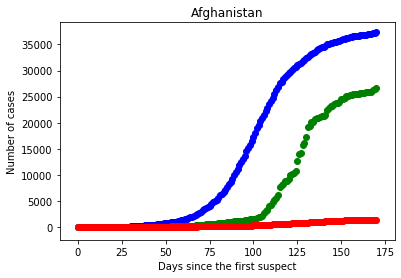

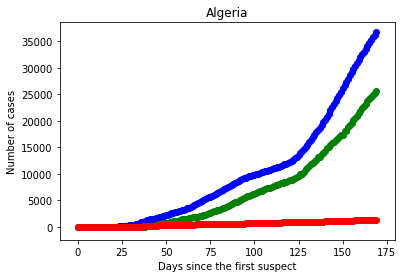

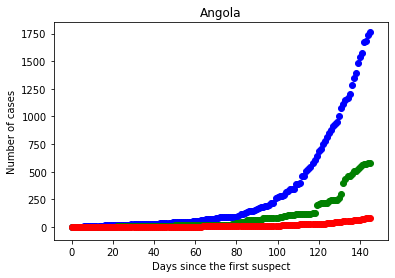

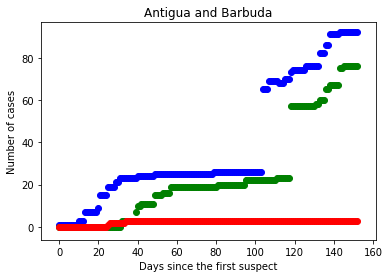

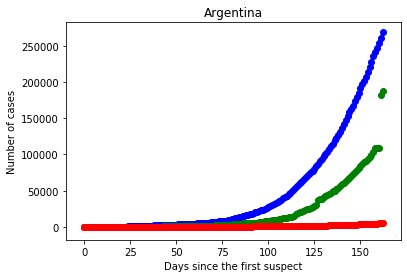

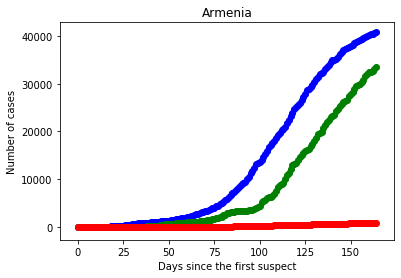

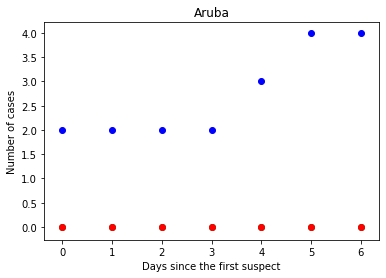

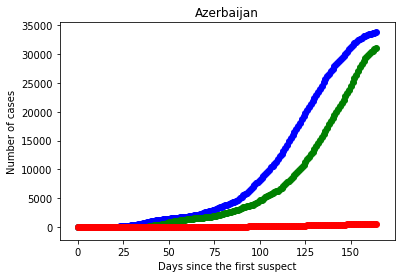

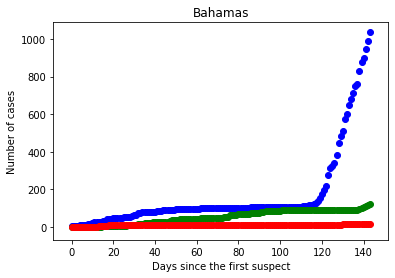

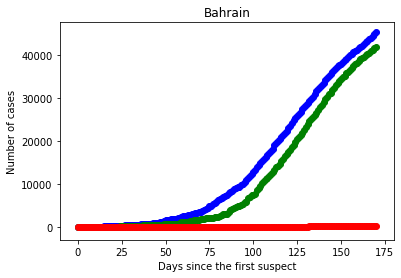

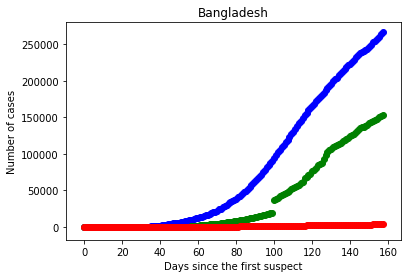

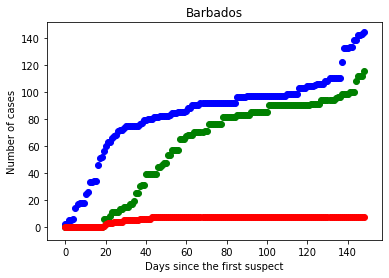

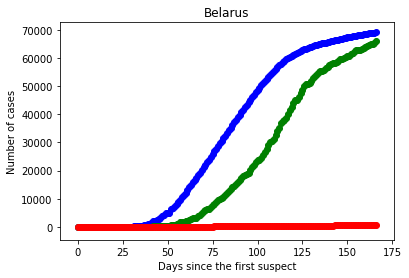

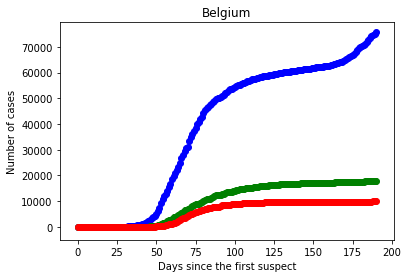

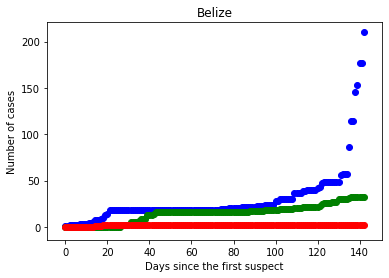

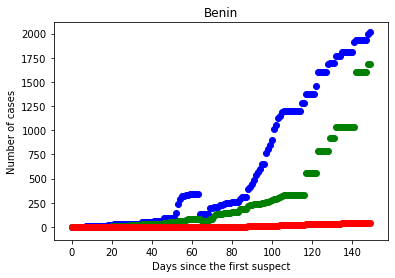

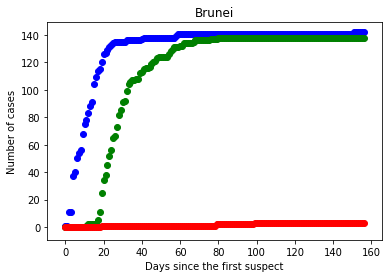

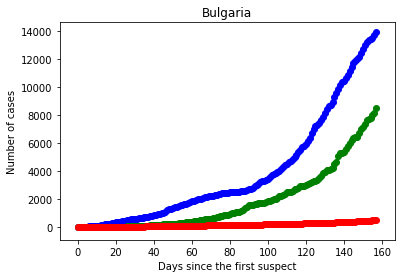

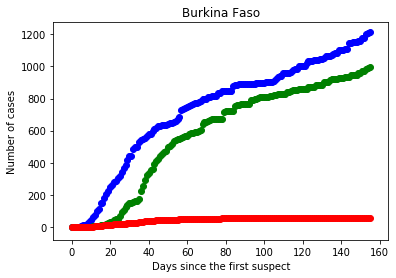

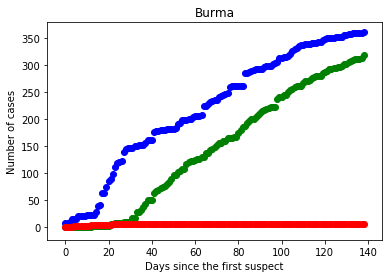

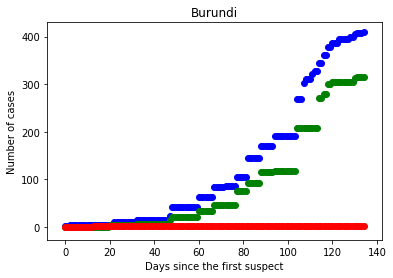

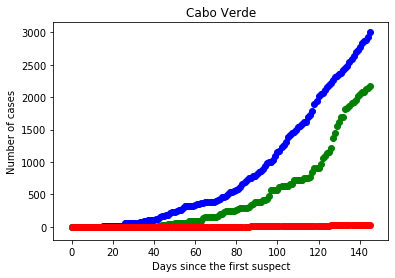

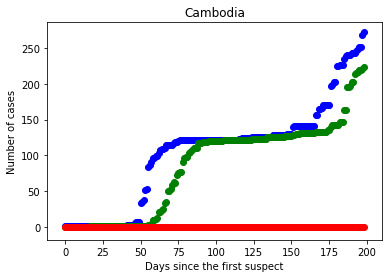

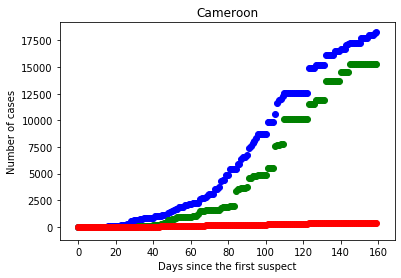

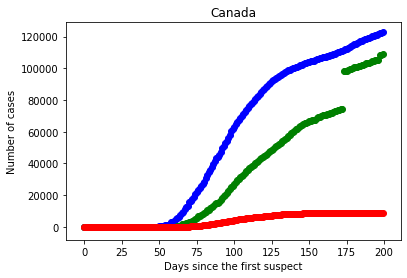

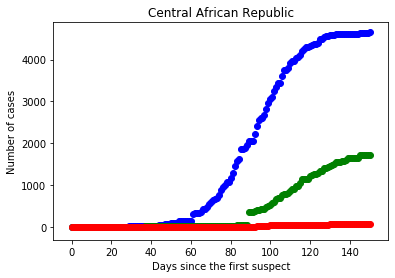

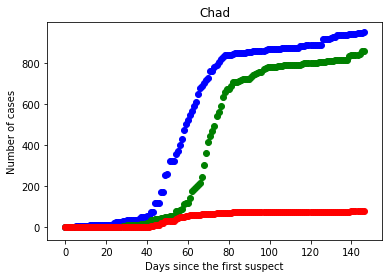

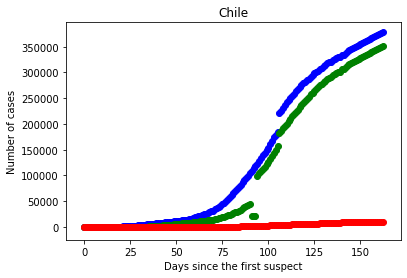

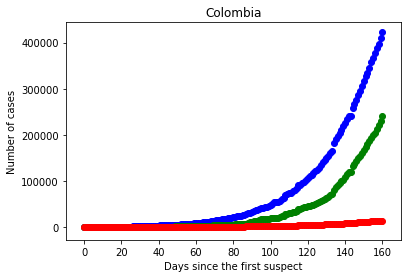

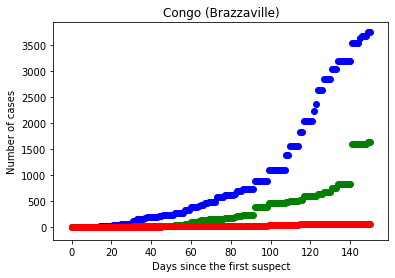

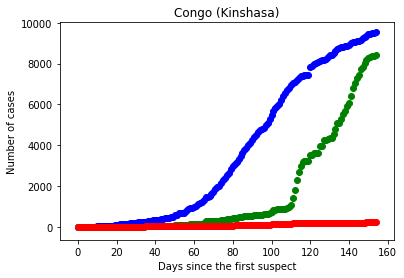

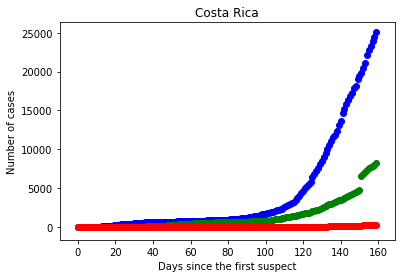

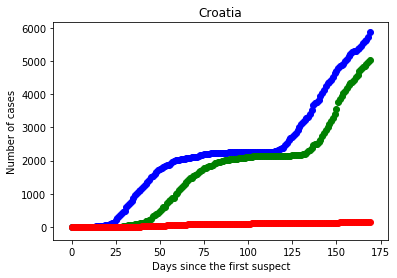

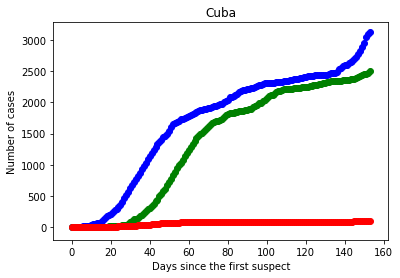

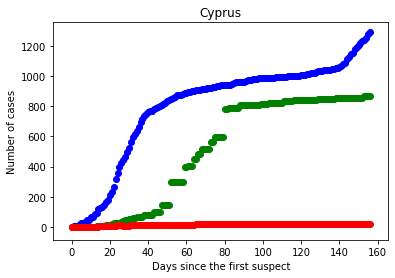

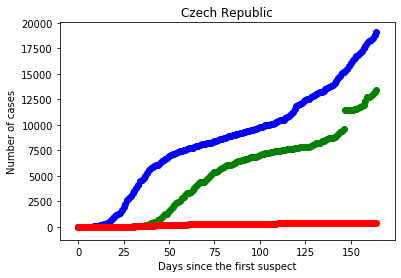

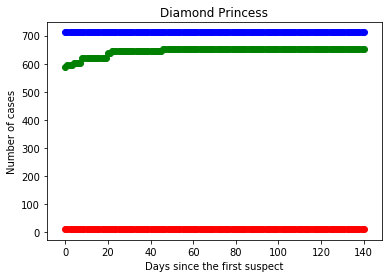

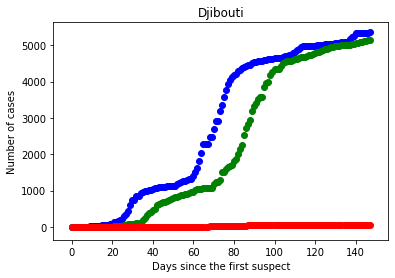

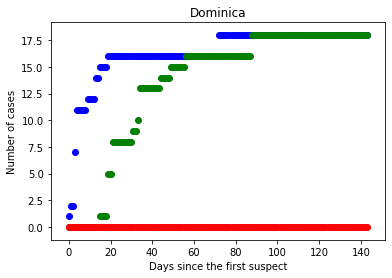

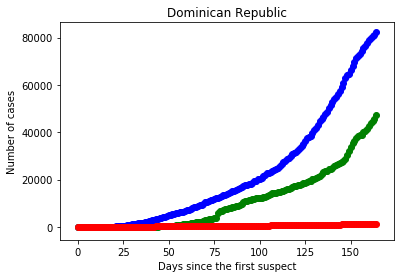

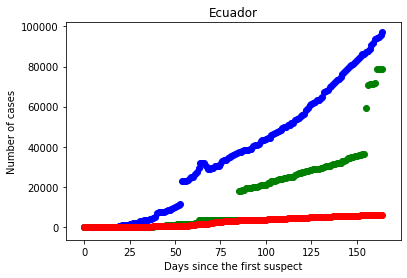

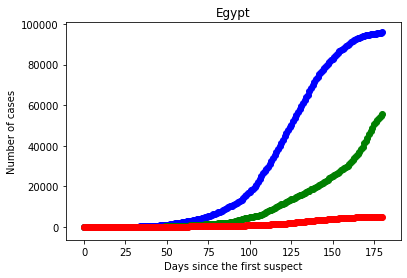

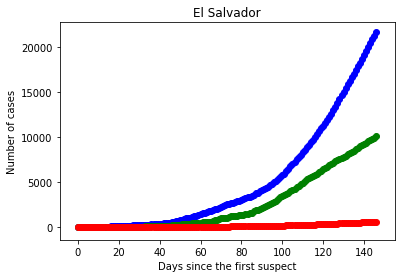

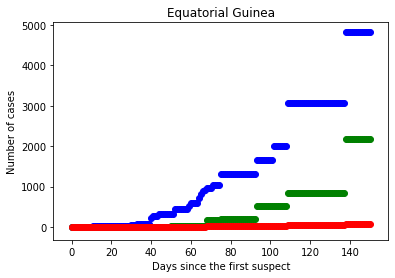

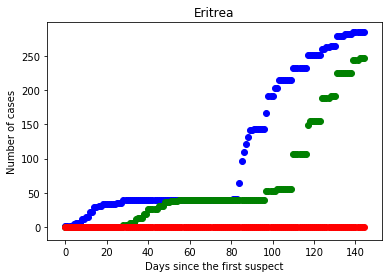

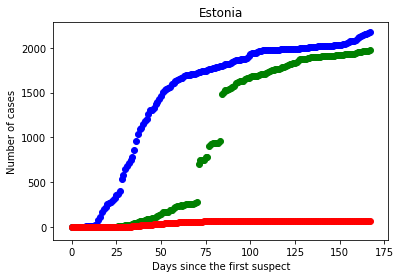

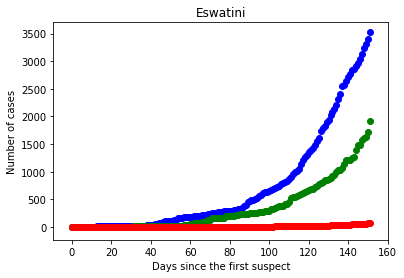

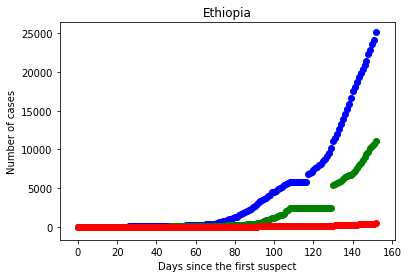

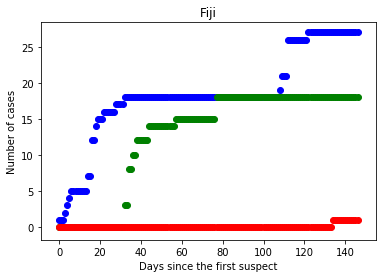

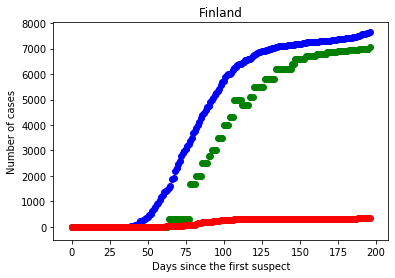

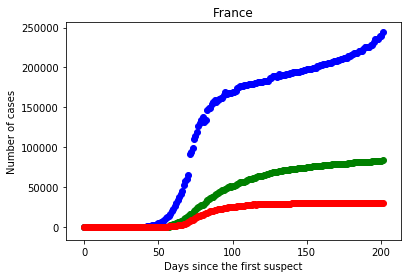

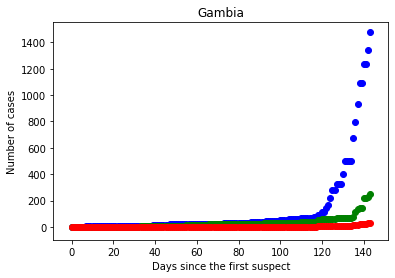

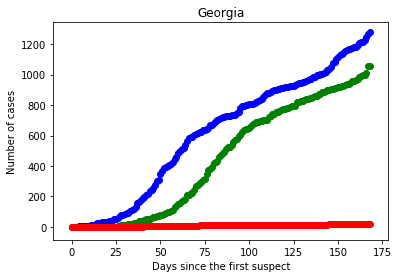

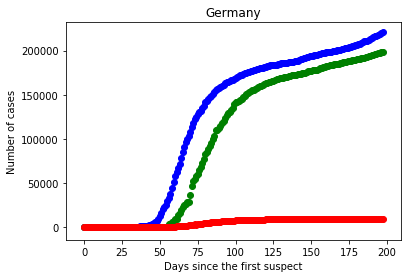

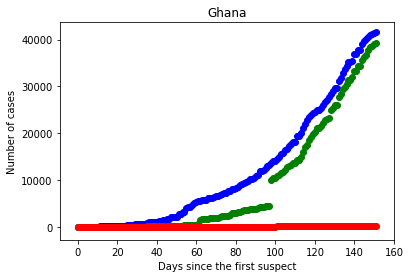

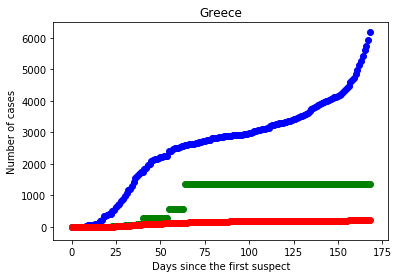

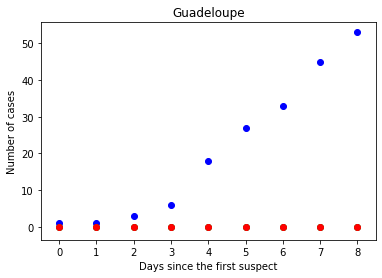

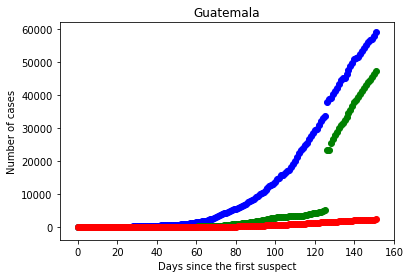

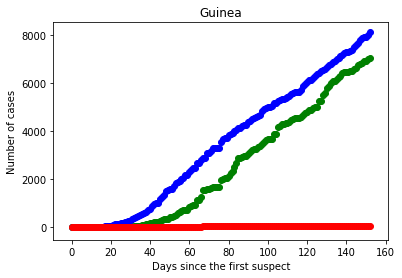

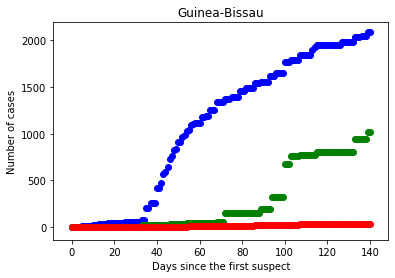

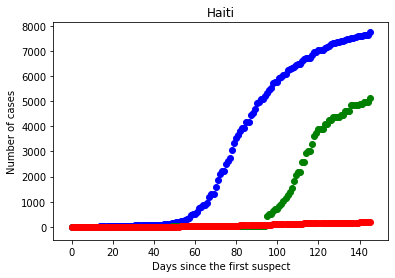

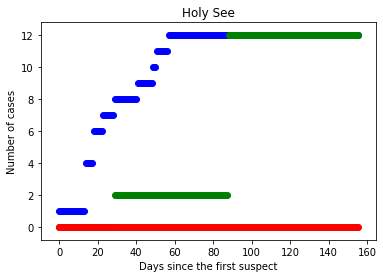

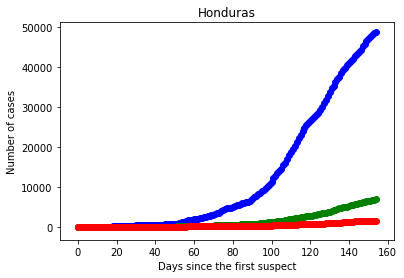

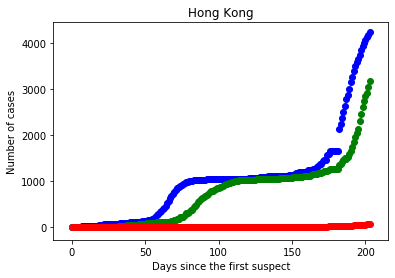

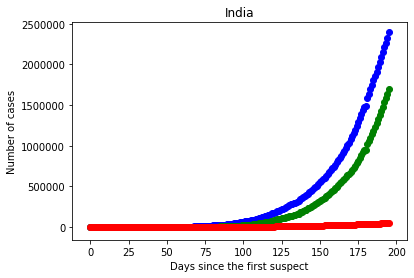

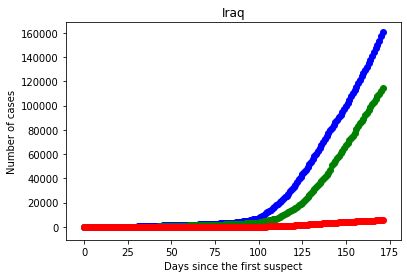

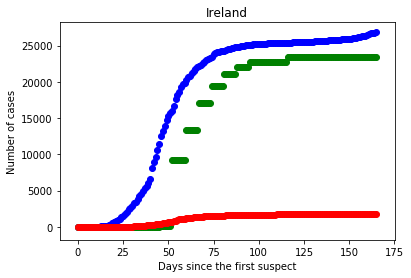

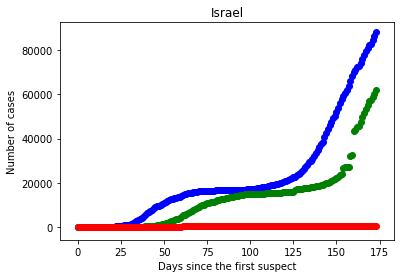

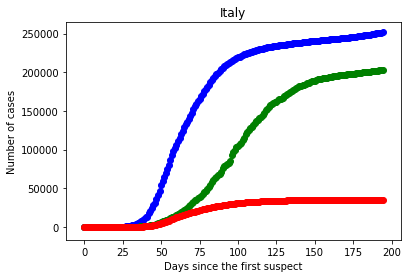

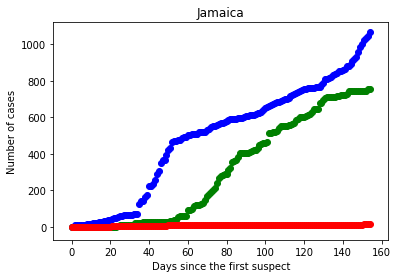

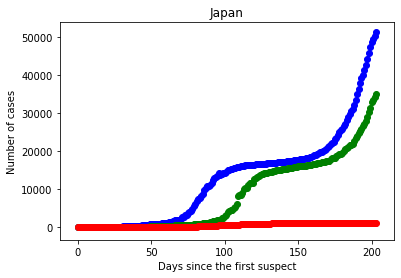

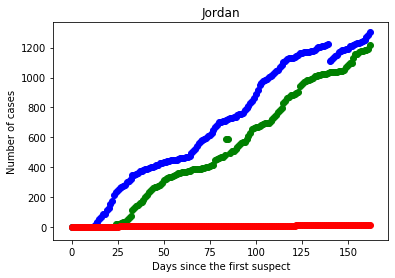

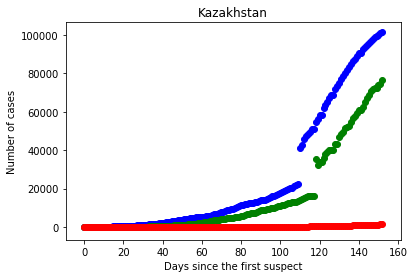

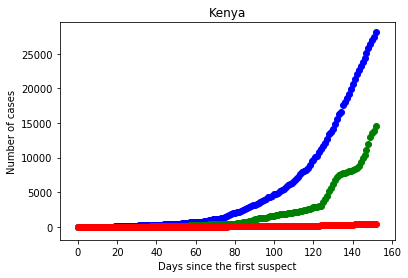

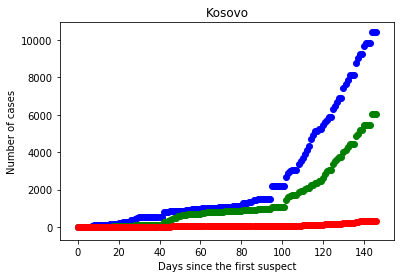

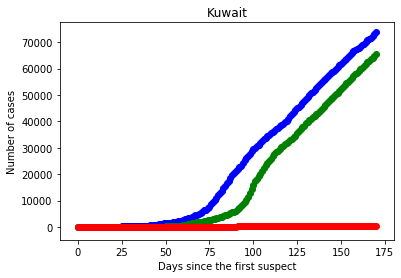

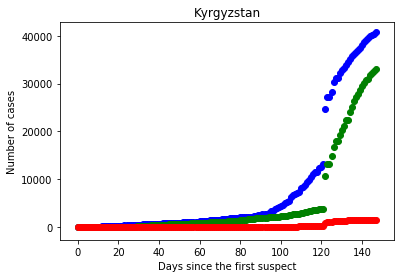

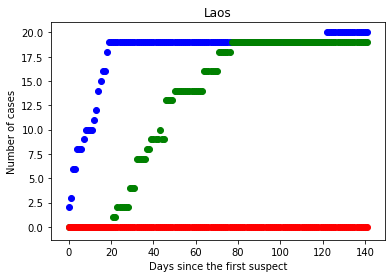

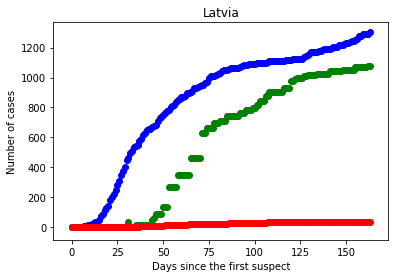

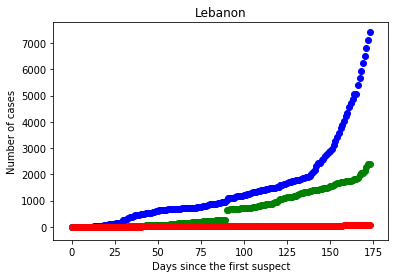

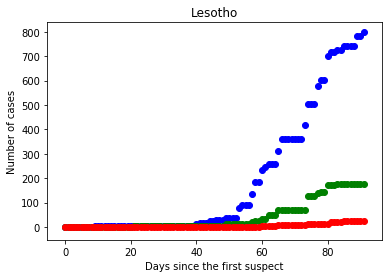

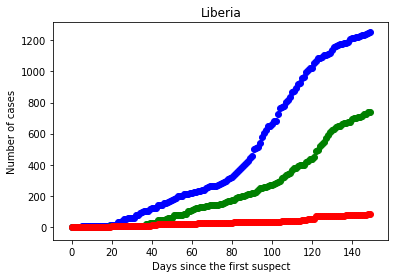

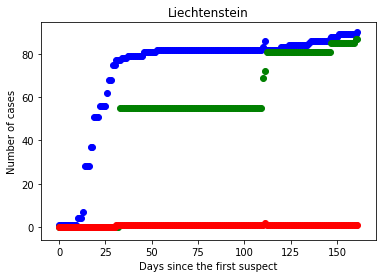

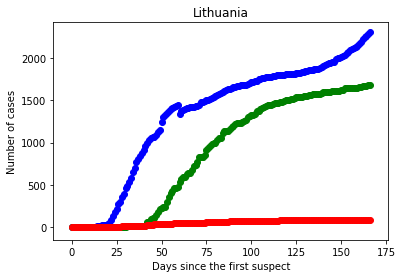

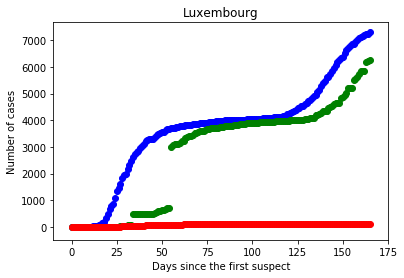

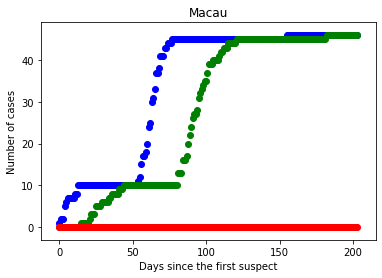

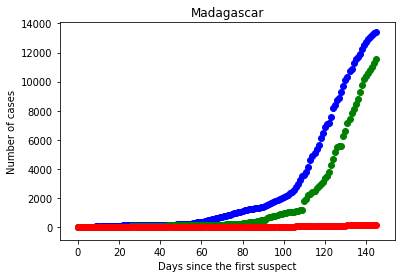

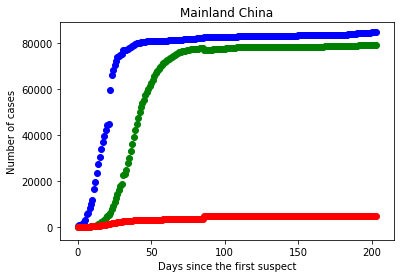

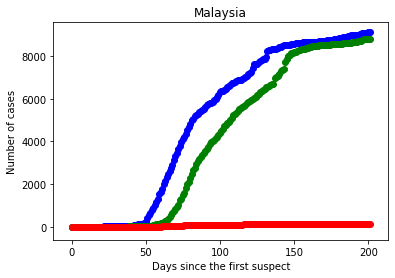

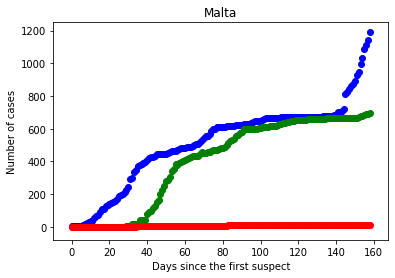

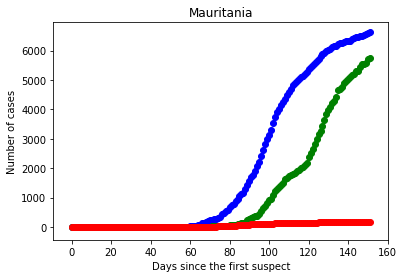

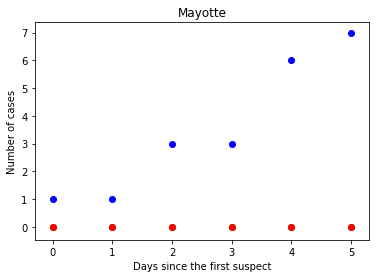

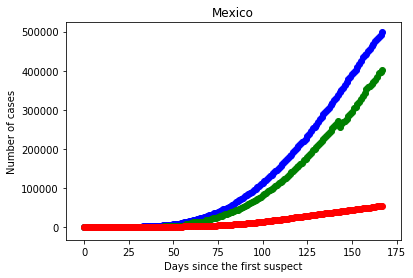

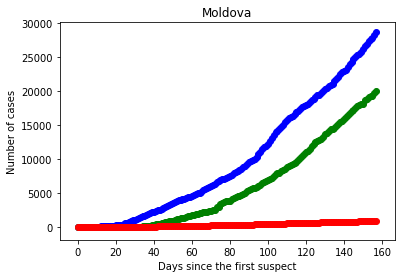

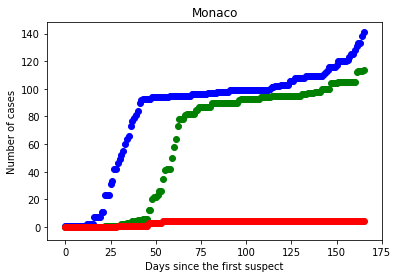

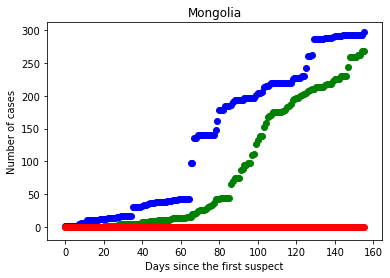

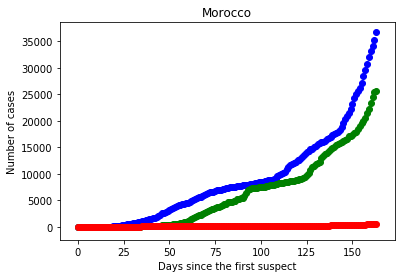

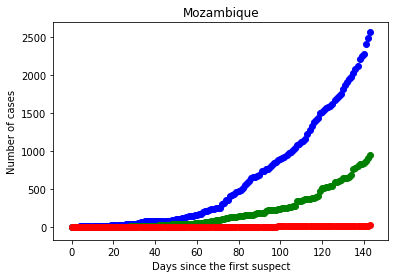

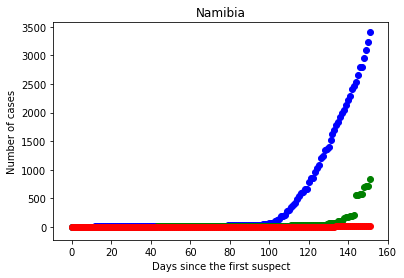

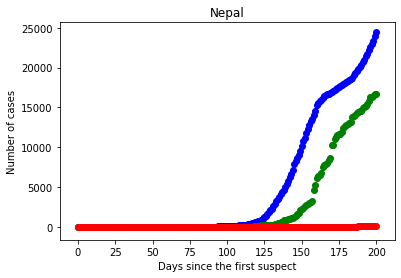

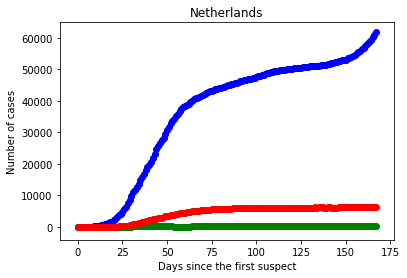

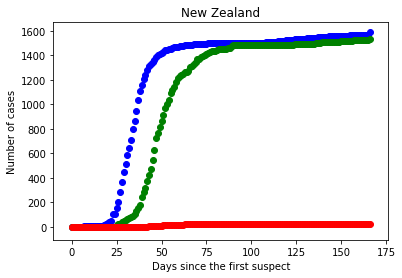

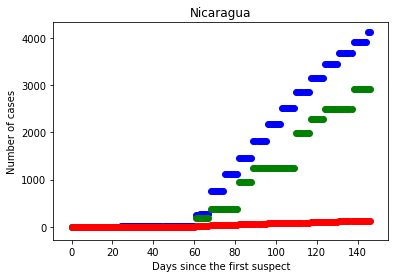

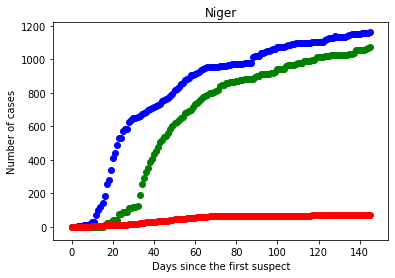

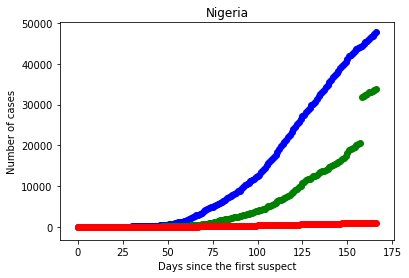

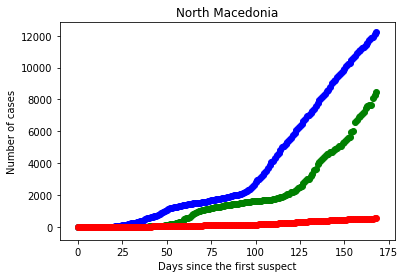

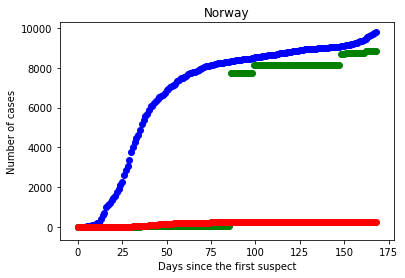

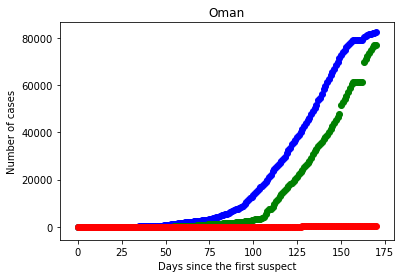

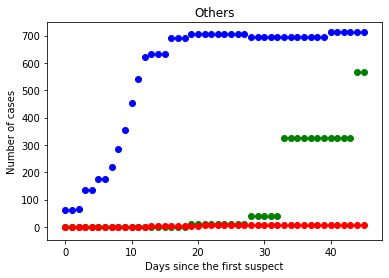

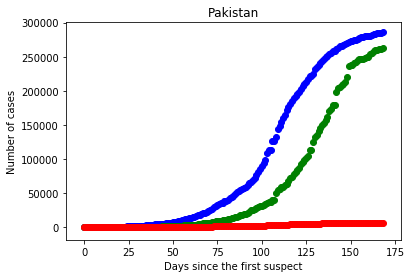

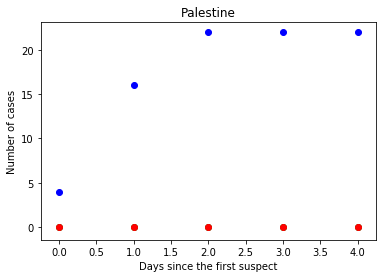

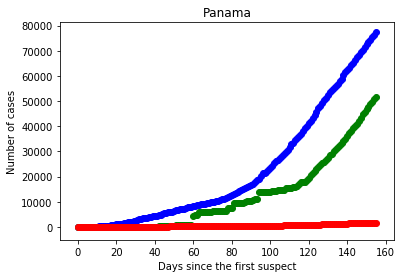

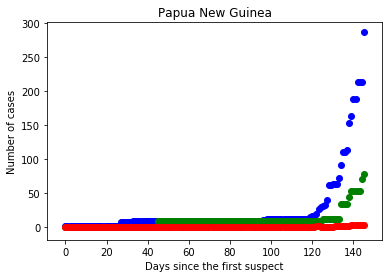

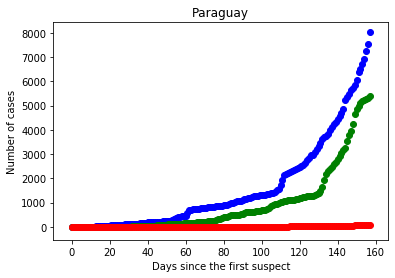

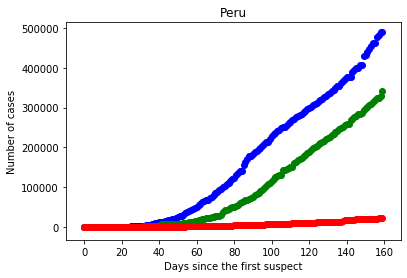

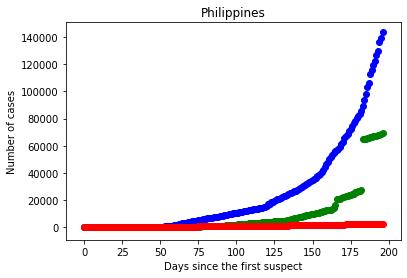

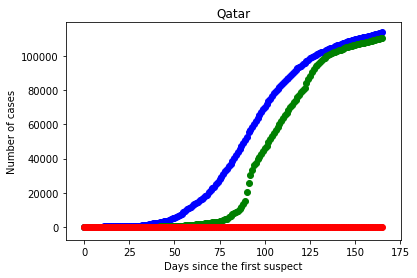

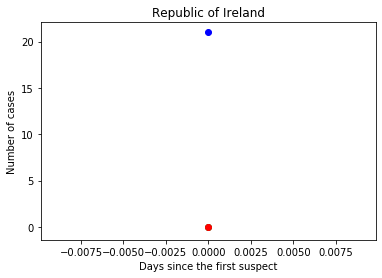

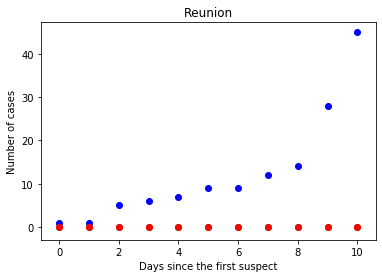

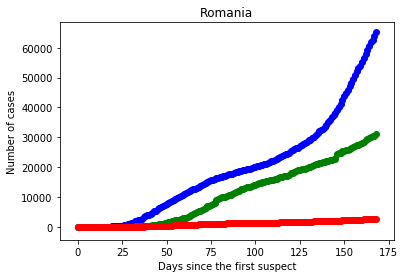

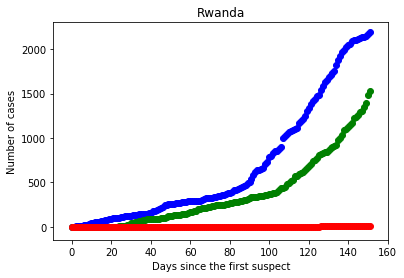

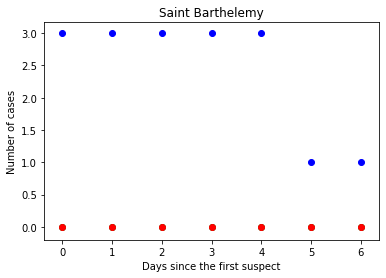

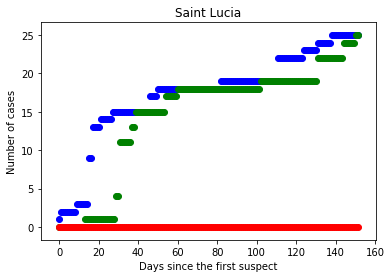

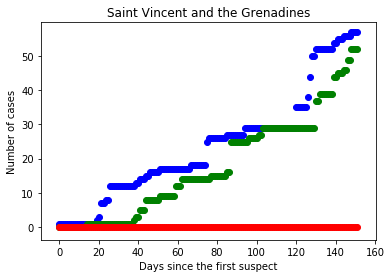

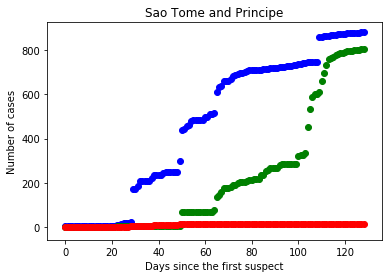

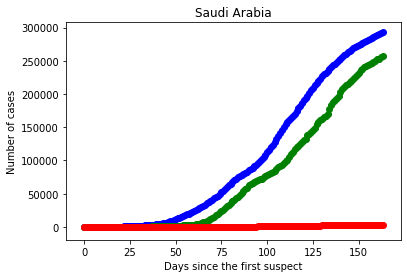

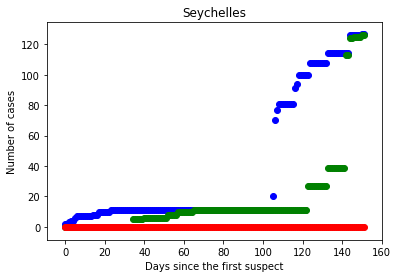

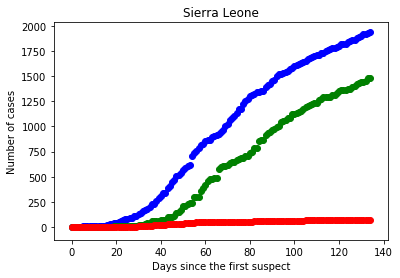

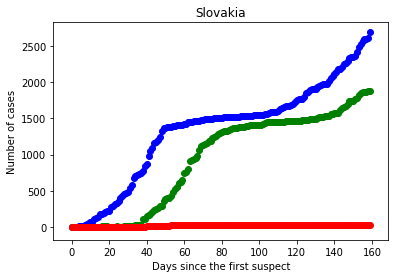

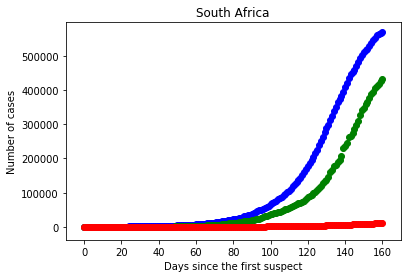

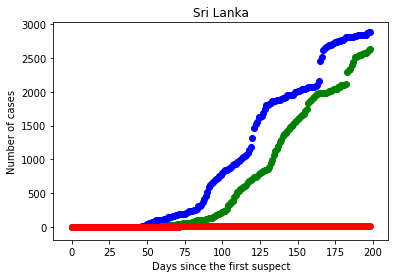

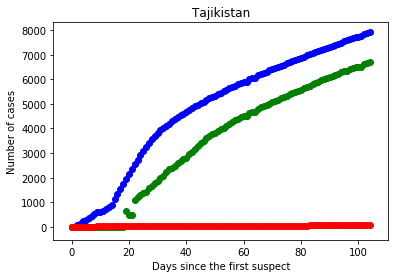

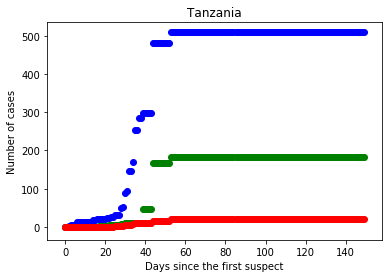

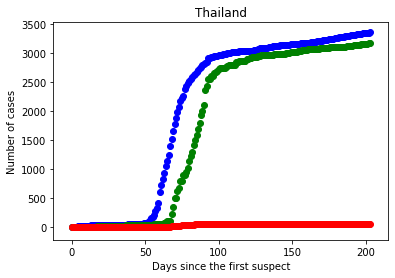

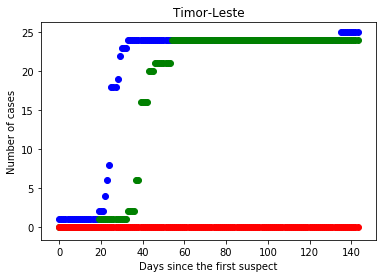

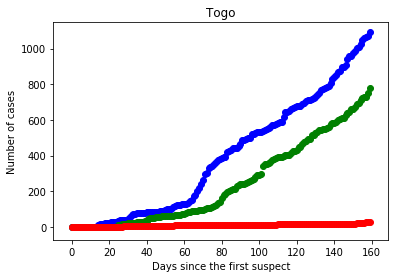

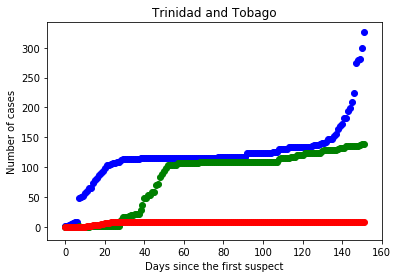

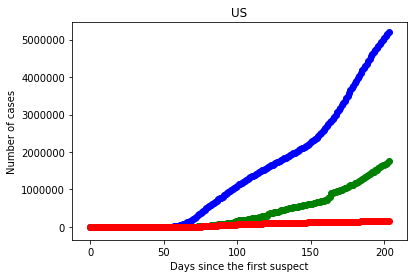

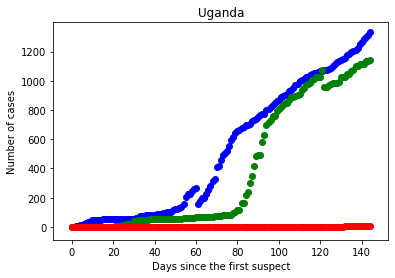

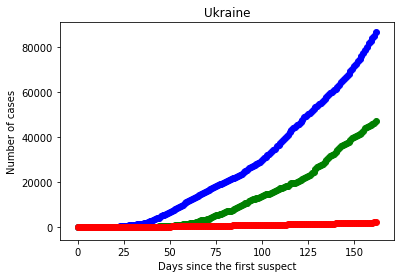

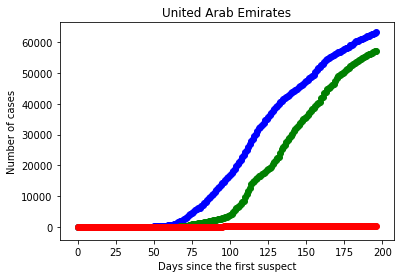

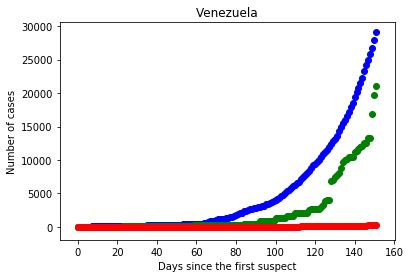

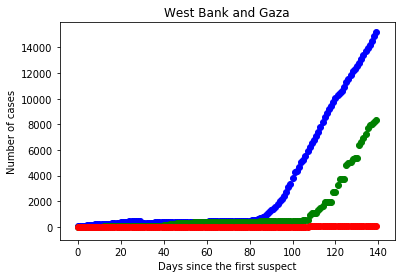

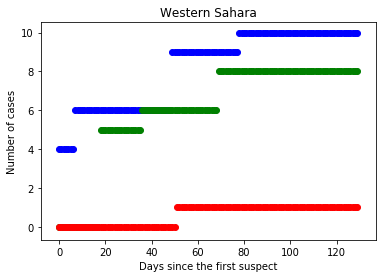

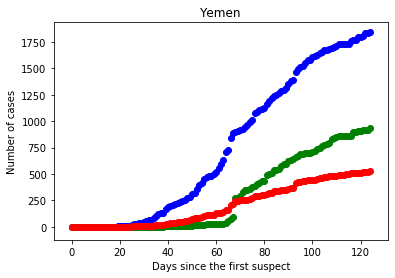

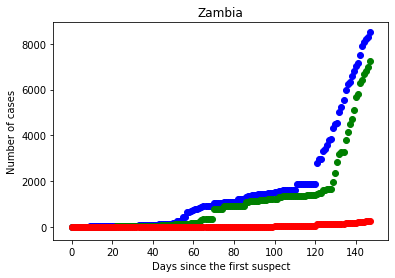

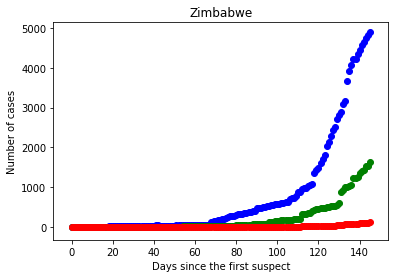

In [16]:
for idx in range(0,len(countries)):    
    C = df3[df3['Country']==countries[idx]].reset_index()
    if sum(C["Confirmed"])>10:
        plt.scatter(np.arange(0,len(C)),C['Confirmed'],color='blue',label='Confirmed')
        plt.scatter(np.arange(0,len(C)),C['Recovered'],color='green',label='Recovered')
        plt.scatter(np.arange(0,len(C)),C['Deaths'],color='red',label='Deaths')
        plt.title(countries[idx])
        plt.xlabel('Days since the first suspect')
        plt.ylabel('Number of cases')
        plt.savefig(r'Plot\\'+str(countries[idx])+'.png') 
        plt.show()    

In [17]:
df4 = df3.groupby(['Date'])[['Date','Confirmed','Deaths','Recovered']].sum().reset_index()

In [18]:
C = df4
plt.scatter(np.arange(0,len(C)),C['Confirmed'],color='blue',label='Confirmed')
plt.scatter(np.arange(0,len(C)),C['Recovered'],color='green',label='Recovered')
plt.scatter(np.arange(0,len(C)),C['Deaths'],color='red',label='Deaths')
plt.title('World')
plt.xlabel('Days since the first suspect')
plt.ylabel('Number of cases')
plt.legend()
plt.show()

In [19]:
df.head(10)

Date      State         Country  Confirmed  Deaths  Recovered
0 2020-01-22      Anhui  Mainland China        1.0     0.0        0.0
1 2020-01-22    Beijing  Mainland China       14.0     0.0        0.0
2 2020-01-22  Chongqing  Mainland China        6.0     0.0        0.0
3 2020-01-22     Fujian  Mainland China        1.0     0.0        0.0
4 2020-01-22      Gansu  Mainland China        0.0     0.0        0.0
5 2020-01-22  Guangdong  Mainland China       26.0     0.0        0.0
6 2020-01-22    Guangxi  Mainland China        2.0     0.0        0.0
7 2020-01-22    Guizhou  Mainland China        1.0     0.0        0.0
8 2020-01-22     Hainan  Mainland China        4.0     0.0        0.0
9 2020-01-22      Hebei  Mainland China        1.0     0.0        0.0

In [20]:
import cv2 as cv2

In [21]:
image=cv2.imread('Plot\Mainland China.png')

In [22]:
image.shape

(288, 432, 3)

In [23]:
import os
path='Plot'
paths=[]
for folder in path:
        data = os.listdir(path) 
for path in data:
    paths.append(os.path.join("Plot",path))


In [24]:
paths

['Plot\\Afghanistan.png',
 'Plot\\Albania.png',
 'Plot\\Algeria.png',
 'Plot\\Andorra.png',
 'Plot\\Angola.png',
 'Plot\\Antigua and Barbuda.png',
 'Plot\\Argentina.png',
 'Plot\\Armenia.png',
 'Plot\\Aruba.png',
 'Plot\\Australia.png',
 'Plot\\Austria.png',
 'Plot\\Azerbaijan.png',
 'Plot\\Bahamas.png',
 'Plot\\Bahrain.png',
 'Plot\\Bangladesh.png',
 'Plot\\Barbados.png',
 'Plot\\Belarus.png',
 'Plot\\Belgium.png',
 'Plot\\Belize.png',
 'Plot\\Benin.png',
 'Plot\\Bhutan.png',
 'Plot\\Bolivia.png',
 'Plot\\Bosnia and Herzegovina.png',
 'Plot\\Botswana.png',
 'Plot\\Brazil.png',
 'Plot\\Brunei.png',
 'Plot\\Bulgaria.png',
 'Plot\\Burkina Faso.png',
 'Plot\\Burma.png',
 'Plot\\Burundi.png',
 'Plot\\Cabo Verde.png',
 'Plot\\Cambodia.png',
 'Plot\\Cameroon.png',
 'Plot\\Canada.png',
 'Plot\\Central African Republic.png',
 'Plot\\Chad.png',
 'Plot\\Chile.png',
 'Plot\\Colombia.png',
 'Plot\\Comoros.png',
 'Plot\\Congo (Brazzaville).png',
 'Plot\\Congo (Kinshasa).png',
 'Plot\\Costa Rica.png

In [25]:
data

['Afghanistan.png',
 'Albania.png',
 'Algeria.png',
 'Andorra.png',
 'Angola.png',
 'Antigua and Barbuda.png',
 'Argentina.png',
 'Armenia.png',
 'Aruba.png',
 'Australia.png',
 'Austria.png',
 'Azerbaijan.png',
 'Bahamas.png',
 'Bahrain.png',
 'Bangladesh.png',
 'Barbados.png',
 'Belarus.png',
 'Belgium.png',
 'Belize.png',
 'Benin.png',
 'Bhutan.png',
 'Bolivia.png',
 'Bosnia and Herzegovina.png',
 'Botswana.png',
 'Brazil.png',
 'Brunei.png',
 'Bulgaria.png',
 'Burkina Faso.png',
 'Burma.png',
 'Burundi.png',
 'Cabo Verde.png',
 'Cambodia.png',
 'Cameroon.png',
 'Canada.png',
 'Central African Republic.png',
 'Chad.png',
 'Chile.png',
 'Colombia.png',
 'Comoros.png',
 'Congo (Brazzaville).png',
 'Congo (Kinshasa).png',
 'Costa Rica.png',
 'Croatia.png',
 'Cuba.png',
 'Cyprus.png',
 'Czech Republic.png',
 'Denmark.png',
 'Diamond Princess.png',
 'Djibouti.png',
 'Dominica.png',
 'Dominican Republic.png',
 'Ecuador.png',
 'Egypt.png',
 'El Salvador.png',
 'Equatorial Guinea.png',
 'Er

In [26]:
def gen_features(img_paths):
    img_features = []
    for img_path in img_paths:
        image = cv2.imread(img_path)
        image=image.reshape(image.shape[0]*image.shape[1]*image.shape[2],1)
        x=image.shape
        img_features.append(image.T)
    img_features=np.array(img_features).reshape(len(img_paths),x[0])
    return img_features

In [27]:
image_feats=gen_features(paths)

In [28]:
image_feats.shape

(201, 373248)

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(image_feats)
scaled_data = scaler.transform(image_feats)


from sklearn.decomposition import PCA
pca = PCA()
pca.fit(scaled_data)

x_pca = pca.transform(scaled_data)

In [30]:
x_pca.shape

(201, 201)

(20, 201)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


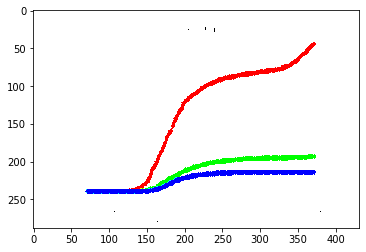

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


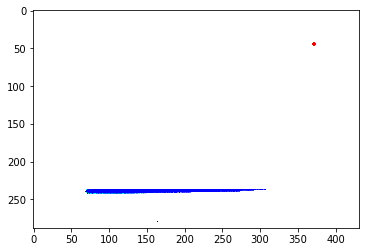

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


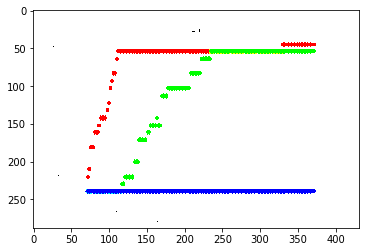

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


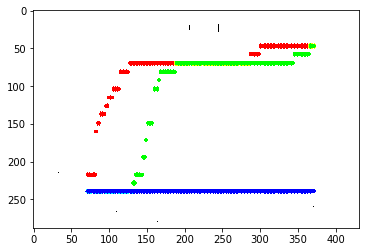

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


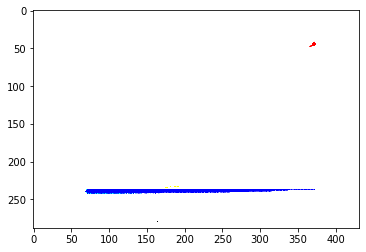

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


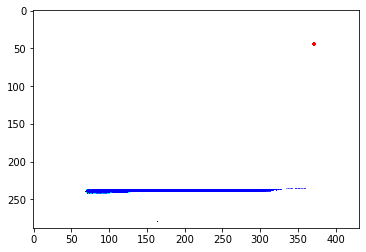

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


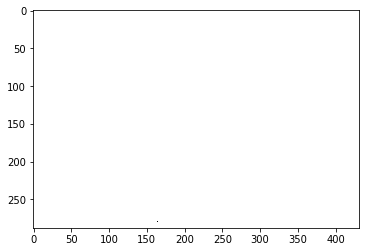

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


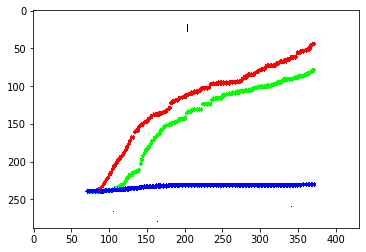

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


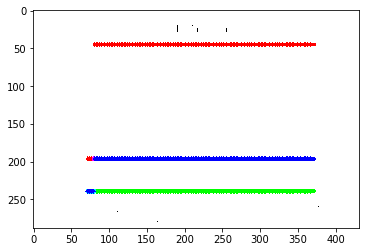

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


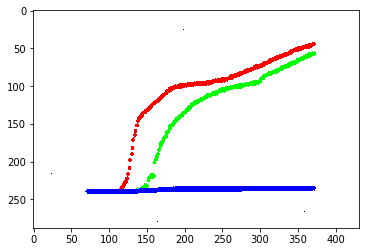

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


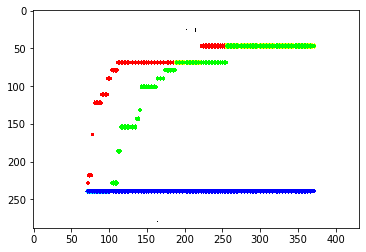

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


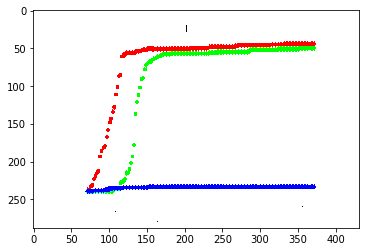

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


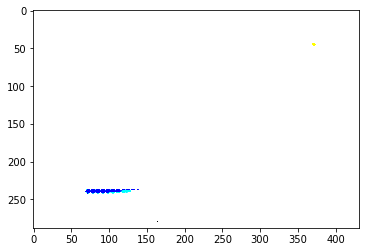

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


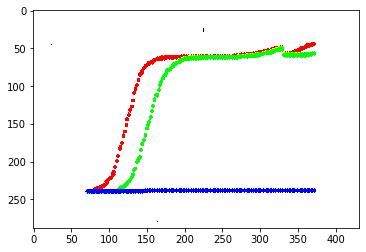

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


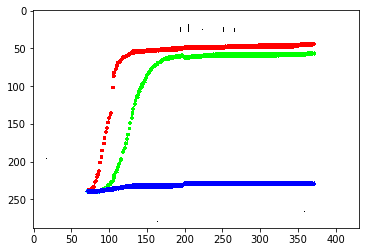

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[16 16 16  4  8 16  8  7  9 16  9  7  8  7 16  9 16  0 16  1 16 16 16 16
  1 16 16 10  9  7  1 16 16 16 16  9  7  8  9 16  3  8 16  9  9 16  9 19
  9 14  7 16 16 16 16 16  9  3  8 16  9  9  9  3 16 16  9  1 16 16  9 16
 16 16 16 16 16 16 16  9 17  8  1 16  1  9 16  9  7 16 16  9  1  8 16 16
  8  5  9  1 16  3  3  9  9  9 16  1 18 16  9 16  9  9  9  3 15  9 16 16
 13 16  8 16  8 11 16 16 16 16 16  9 16  1  9  9  3 16  7  9  1 16  8 16
  8 16 16 16  9  9 16  7  1  9  6 16 16  9 16 16 16 16 16 16 16 16  9 16
  1 12 16  9 16 16  8 16  9  8  9  9  9  9 16 16 16  9  9  3 16 16 16  9
 16  1  8 16 16  2 16  1  8]


In [31]:
kmeans = KMeans(n_clusters=20, random_state=0).fit(x_pca)

print(kmeans.cluster_centers_.shape)

pca_inv=pca.inverse_transform(kmeans.cluster_centers_)


sc_inv=scaler.inverse_transform(pca_inv)

for i in range(len(kmeans.cluster_centers_)):
    plt.imshow(sc_inv[i].reshape(288, 432, 3))
    #plt.savefig(str(i)+'.png')
    plt.show()

print(kmeans.labels_)


In [32]:
from collections import Counter
Counter(kmeans.labels_)

Counter({16: 91,
         4: 1,
         8: 17,
         7: 9,
         9: 47,
         0: 1,
         1: 15,
         10: 1,
         3: 8,
         19: 1,
         14: 1,
         17: 1,
         5: 1,
         18: 1,
         15: 1,
         13: 1,
         11: 1,
         6: 1,
         12: 1,
         2: 1})

# Linear regression

In [33]:
def train_regression(lis,dates):
    X_train,X_test,Y_train,Y_test=train_test_split(dates, lis, test_size=0.25, shuffle=False)
    poly = PolynomialFeatures(degree=6)
    poly_X_train_confirmed = poly.fit_transform(X_train)
    poly_X_test_confirmed = poly.fit_transform(X_test)
    linear_model = LinearRegression(normalize=True, fit_intercept=False)
    linear_model.fit(poly_X_train_confirmed, Y_train)
    test_linear_pred = linear_model.predict(poly_X_test_confirmed)
    print('Testing Error MAE:', mean_absolute_error(test_linear_pred, Y_test))
    print('Testing Error MSE:',mean_squared_error(test_linear_pred, Y_test))
    plt.plot(test_linear_pred,label="predicted")
    plt.plot(Y_test,label="actual")
    plt.legend()
    plt.show()
    return linear_model,poly

    
def create_data(kcenter):
    days=201
    dates=np.array([i for i in range((days))]).reshape(-1, 1)
    lis=kcenter
    lis=lis.reshape(-1,1)
    
    return lis,dates

def predict(start_date,end_date,model,poly):
    new_dates=np.array([i for i in range(start_date,end_date)]).reshape(-1, 1)
    new_dates=poly.fit_transform(new_dates)
    test_predict = model.predict(new_dates)
    return test_predict

def plot_predict(lis,test_predict):
    arr = np.concatenate((lis, test_predict))
    arr=arr[-201:]
    arr=arr.reshape(1,-1)
    dumy=np.copy(kmeans.cluster_centers_)
    dumy[0]=arr[0]
    pca_inv=pca.inverse_transform(dumy)
    sc_inv=scaler.inverse_transform(pca_inv)
    plt.imshow(sc_inv[0].reshape(288, 432, 3))
    plt.show()
    
    

Testing Error MAE: 70.97088712548093
Testing Error MSE: 11942.864941323103


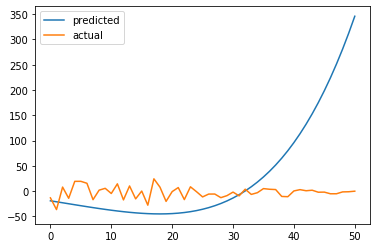

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


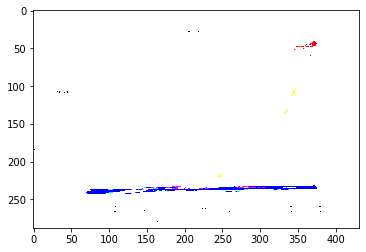

Testing Error MAE: 181.1606259057963
Testing Error MSE: 64636.9664082435


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


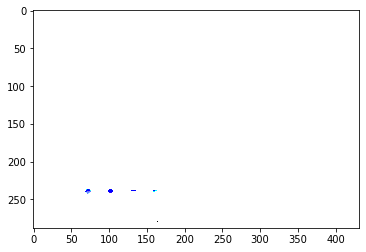

Testing Error MAE: 1612.065976590636
Testing Error MSE: 5355820.199885209


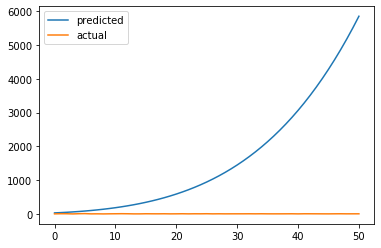

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Testing Error MAE: 105.95858037932835
Testing Error MSE: 25052.730978100295


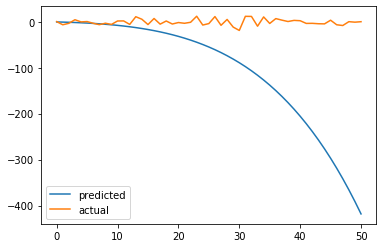

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


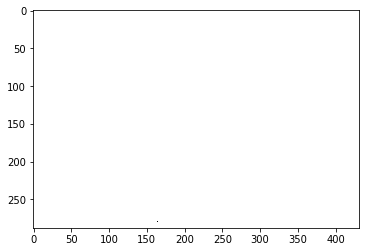

Testing Error MAE: 634.0828078523596
Testing Error MSE: 827634.1781311268


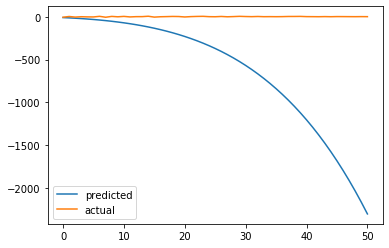

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Testing Error MAE: 151.83126498552036
Testing Error MSE: 46982.632791984004


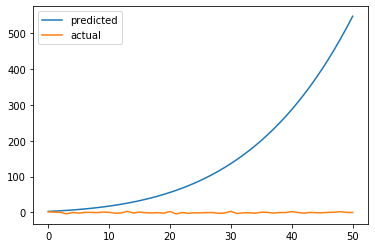

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


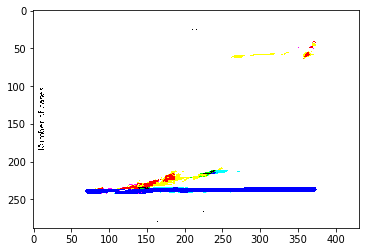

Testing Error MAE: 222.99354354353855
Testing Error MSE: 96218.75092307273


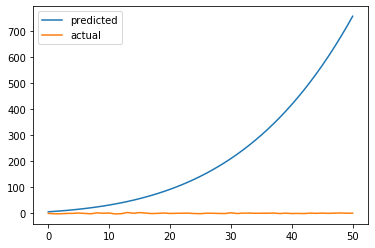

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


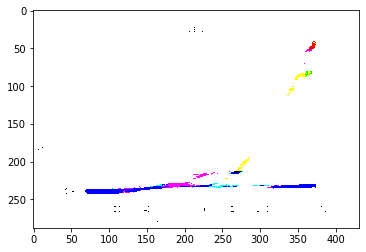

Testing Error MAE: 237.26880384449015
Testing Error MSE: 113598.6123623539


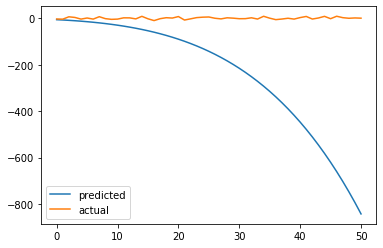

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


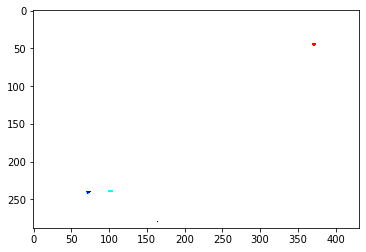

Testing Error MAE: 165.48985520624217
Testing Error MSE: 58329.89461758969


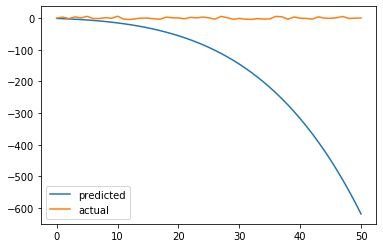

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


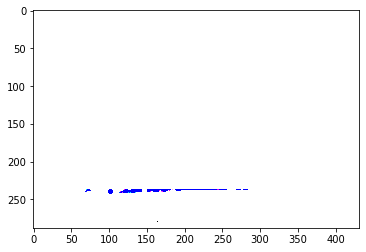

Testing Error MAE: 7.605064946435843
Testing Error MSE: 152.86352522734262


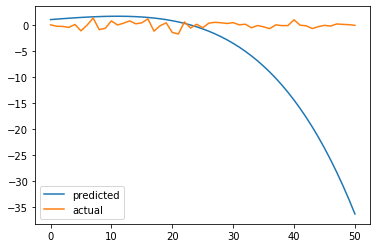

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


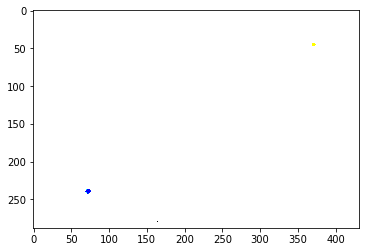

Testing Error MAE: 697.7631616955923
Testing Error MSE: 1010189.6005940747


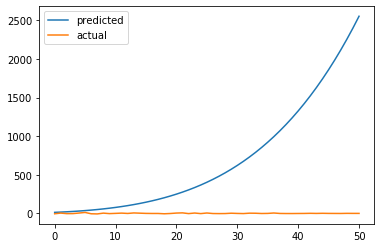

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


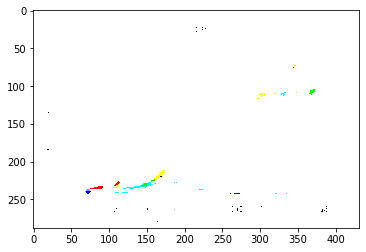

Testing Error MAE: 596.5628045087
Testing Error MSE: 750231.4073398869


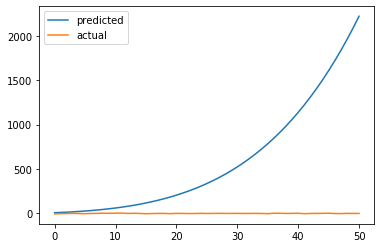

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


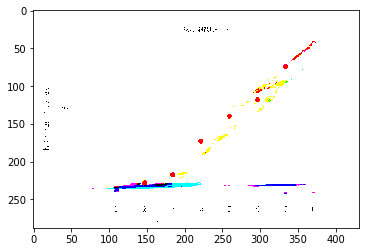

Testing Error MAE: 318.28371987791826
Testing Error MSE: 200719.88500109772


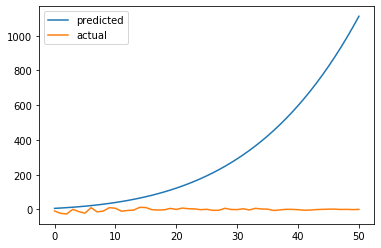

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


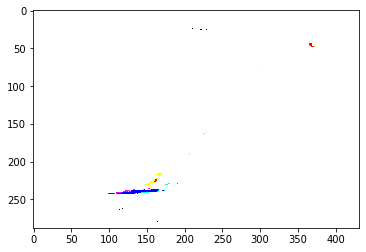

Testing Error MAE: 137.36173751883217
Testing Error MSE: 38897.52116465198


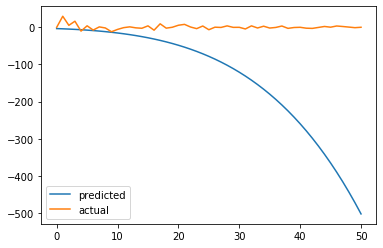

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


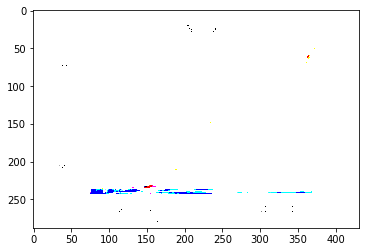

Testing Error MAE: 312.312453586872
Testing Error MSE: 209606.82443178407


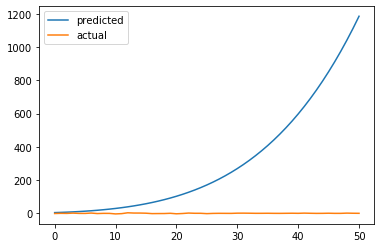

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


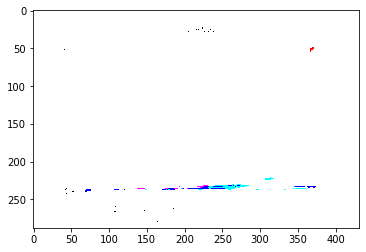

Testing Error MAE: 1385.7138866776288
Testing Error MSE: 3963141.4275561487


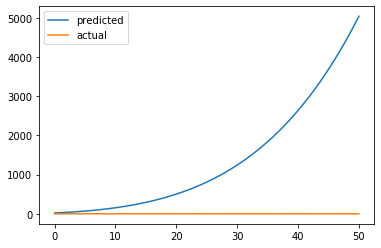

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


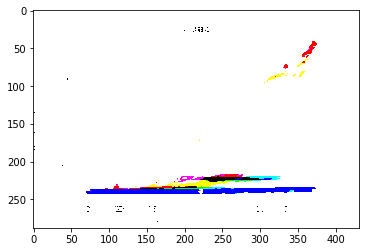

Testing Error MAE: 14.874300596456813
Testing Error MSE: 423.68359011320683


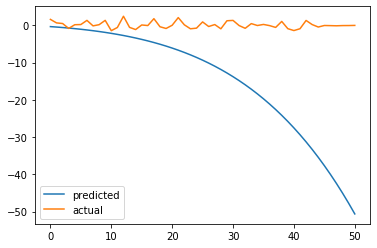

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


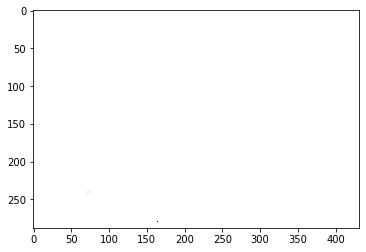

Testing Error MAE: 1276.4136863025126
Testing Error MSE: 3372908.8000602173


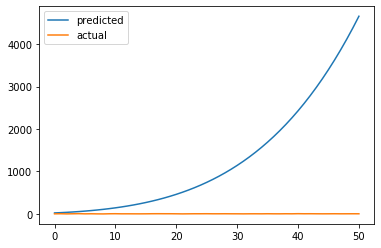

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Testing Error MAE: 1099.3476487385744
Testing Error MSE: 2496090.144052319


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


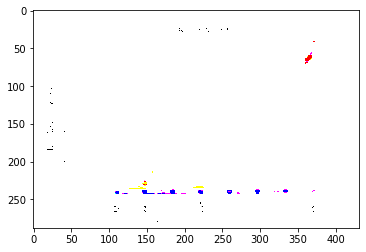

Testing Error MAE: 3226.84343031726
Testing Error MSE: 21462455.41183991


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


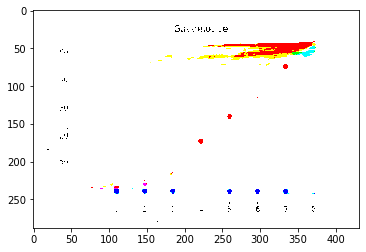

In [34]:
for i in range(len(kmeans.cluster_centers_)):
    lis,dates=create_data(kmeans.cluster_centers_[i])
    lin_model,poly=train_regression(lis,dates)
    test_predict=predict(0,2,lin_model,poly)
    plot_predict(lis,test_predict)

# Isotonic Regression

In [35]:
def iso_regression(lis,dates):
    iso_reg = IsotonicRegression().fit(dates.flatten(), lis.flatten())
    pred=iso_reg.predict(dates.flatten())
    pred=pred.reshape(-1,1)
    lis=lis.reshape(-1,1)
    print('MAE:', mean_absolute_error(pred, lis))
    print('MSE:',mean_squared_error(pred, lis))
    plt.plot(pred,label="predicted")
    plt.plot(lis,label="actual")
    plt.legend()
    plt.show()
    return iso_reg

def iso_pred(start_date,end_date,iso_reg):
    new_dates=np.array([i for i in range(start_date,end_date)]).reshape(-1, 1)
    test_predict = iso_reg.predict(new_dates.flatten())
    return test_predict

MAE: 24.474074459151367
MSE: 1164.3403737532503


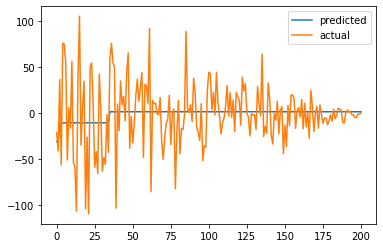

(1, 1)
(201, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


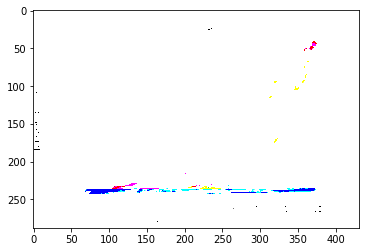

MAE: 6.110853263112202
MSE: 77.25965551207865


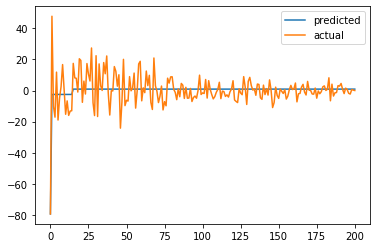

(1, 1)
(201, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


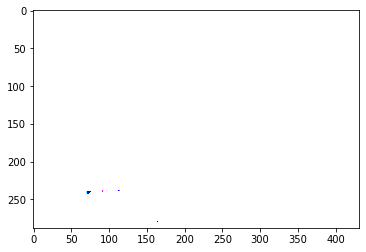

MAE: 22.30469357403409
MSE: 2031.6140807807667


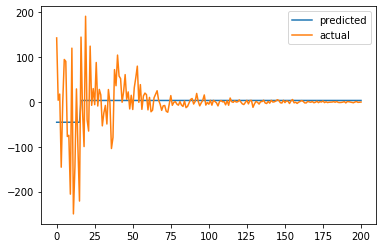

(1, 1)
(201, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


MAE: 7.571980366869357
MSE: 103.57511440725024


(1, 1)
(201, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


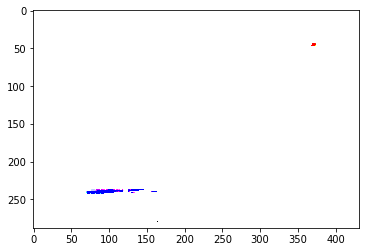

MAE: 23.666016990551142
MSE: 1672.9912095026673


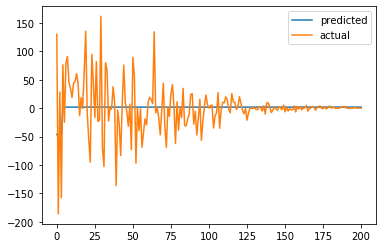

(1, 1)
(201, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


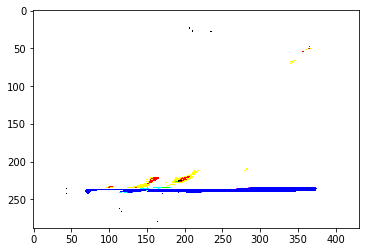

MAE: 20.59754375227376
MSE: 2419.4033514036964


(1, 1)
(201, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


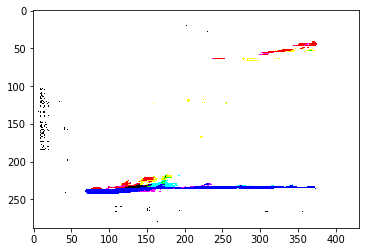

MAE: 23.040050281122994
MSE: 2293.0830025242294


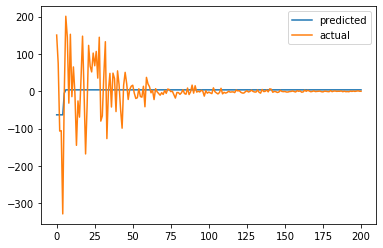

(1, 1)
(201, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


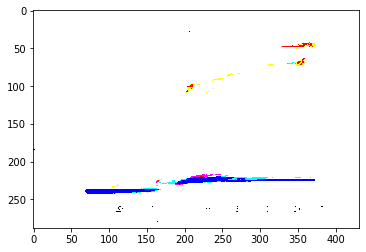

MAE: 7.867954197378823
MSE: 128.0745758422571


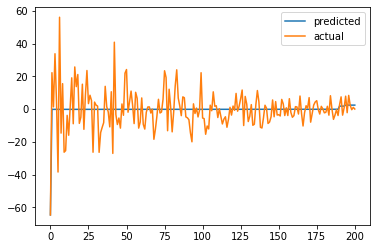

(1, 1)
(201, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


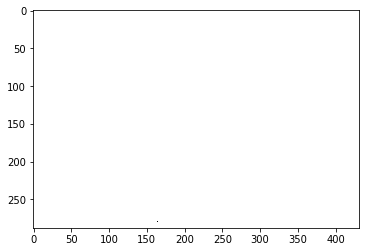

MAE: 5.492140250042318
MSE: 106.94358554936937


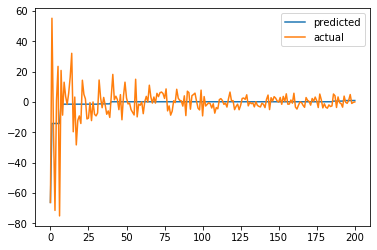

(1, 1)
(201, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


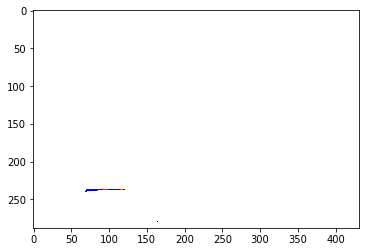

MAE: 3.0556256033528895
MSE: 66.45218885832723


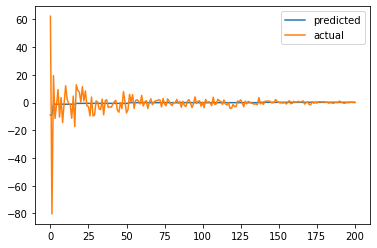

(1, 1)
(201, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


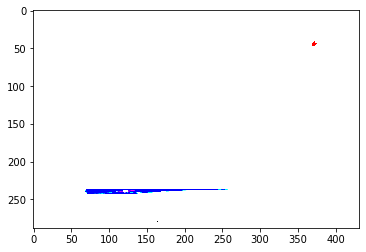

MAE: 22.337952753983117
MSE: 1578.9294089145676


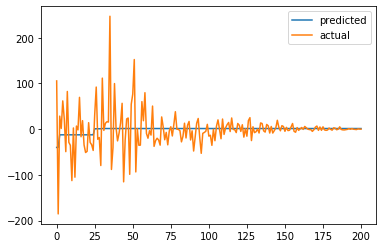

(1, 1)
(201, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


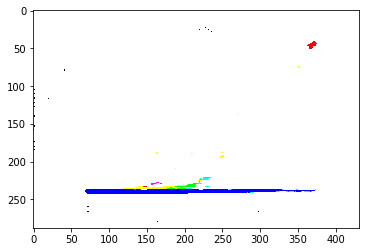

MAE: 22.866930614650965
MSE: 3007.502774743916


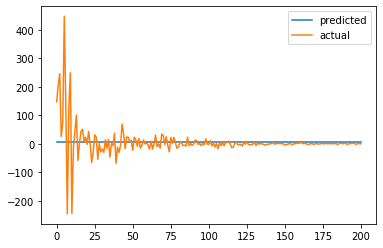

(1, 1)
(201, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


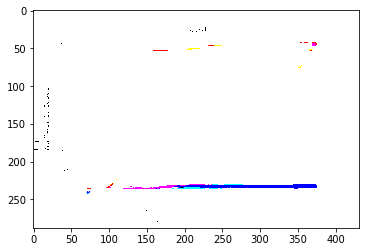

MAE: 23.516783561822297
MSE: 1235.3157444622461


(1, 1)
(201, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


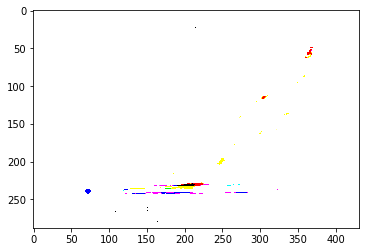

MAE: 23.507327026835874
MSE: 1218.4244880816145


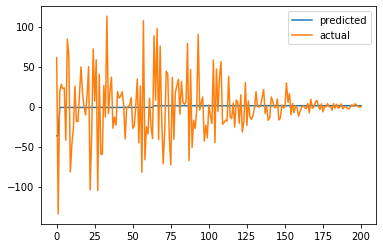

(1, 1)
(201, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


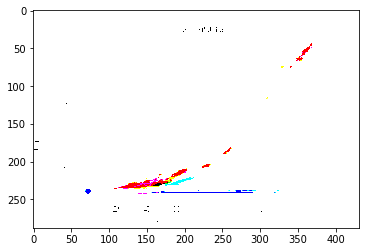

MAE: 21.15316325455698
MSE: 2749.636179362786


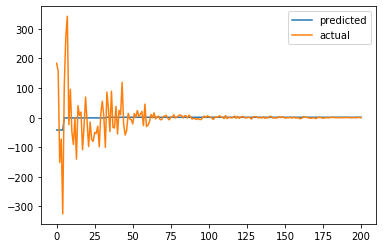

(1, 1)
(201, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


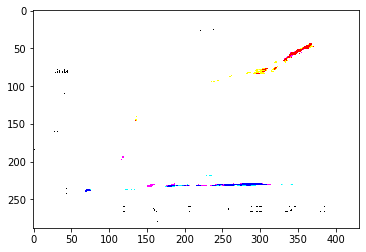

MAE: 22.08945064437734
MSE: 2830.4982518578563


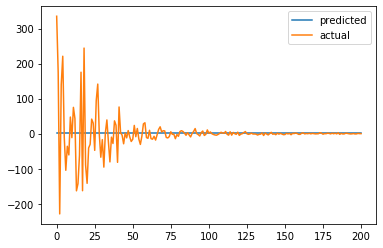

(1, 1)
(201, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


MAE: 1.9269830724832073
MSE: 9.558257013774227


(1, 1)
(201, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


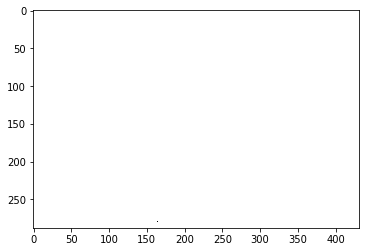

MAE: 19.47553099497152
MSE: 1802.4014321717095


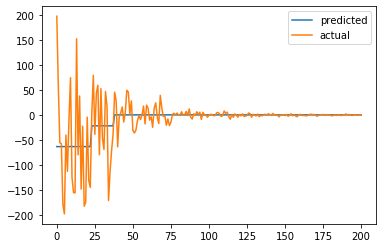

(1, 1)
(201, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


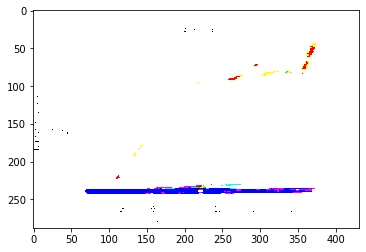

MAE: 21.935240244671846
MSE: 3413.4750467791114


(1, 1)
(201, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


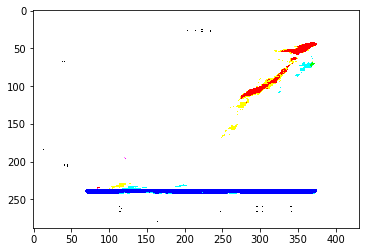

MAE: 20.131002131464278
MSE: 5230.815549017012


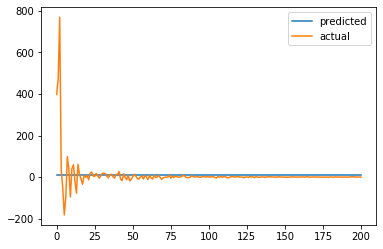

(1, 1)
(201, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


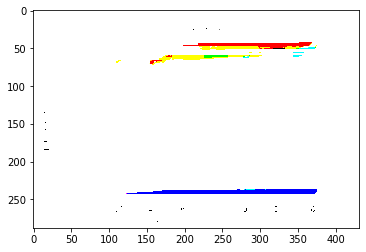

In [36]:
for i in range(len(kmeans.cluster_centers_)):
    lis,dates=create_data(kmeans.cluster_centers_[i])
    lin_model=iso_regression(lis.reshape(1,-1),dates.reshape(1,-1))
    test_predict=iso_pred(1,2,lin_model)
    test_predict=test_predict.reshape(-1,1)
    print(test_predict.shape)
    print(lis.shape)
    
    plot_predict(lis,test_predict)